# Who scores higher, the rich kid or the hard-working kid?
** by Lirong Zhang **

## Preliminary Wrangling

The PISA2012 dataset comes from a triennial international survey conducted by Programme for International Student Assessment (PISA) aiming to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students from 65 economies.

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Load in the orginal dataset.

In [187]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1')

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [188]:
df.CNT.value_counts()

Mexico                      33806
Italy                       31073
Spain                       25313
Canada                      21544
Brazil                      19204
Australia                   14481
United Kingdom              12659
United Arab Emirates        11500
Switzerland                 11229
Qatar                       10966
Colombia                     9073
Finland                      8829
Belgium                      8597
Denmark                      7481
Jordan                       7038
Chile                        6856
Thailand                     6606
Japan                        6351
Chinese Taipei               6046
Peru                         6035
Slovenia                     5911
Argentina                    5908
Kazakhstan                   5808
Portugal                     5722
Indonesia                    5622
Singapore                    5546
Macao-China                  5335
Czech Republic               5327
Uruguay                      5315
Bulgaria      

The dataset is too large and substantially slows down the program, so I get a subset of students from the 10 largest economies.

In [189]:
countries = ['United States of America', 'China-Shanghai', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada', 'Russian Federation']

In [190]:
df_sub = df[df.CNT.isin(countries)]
df_sub.to_csv('pisa2012_sub.csv')

In [191]:
df_sub.CNT.value_counts()

Italy                       31073
Canada                      21544
Brazil                      19204
United Kingdom              12659
Japan                        6351
Russian Federation           5231
China-Shanghai               5177
Germany                      5001
United States of America     4978
France                       4613
Name: CNT, dtype: int64

In [192]:
df = pd.read_csv('pisa2012_sub.csv')

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16,17,18,32,38,124,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,476) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [193]:
df.loc[:, ['MMINS', 'LMINS', 'SMINS', 'OUTHOURS']].describe()

,MMINS,LMINS,SMINS,OUTHOURS
count,68409.000000,67997.000000,66903.000000,73943.000000
mean,241.959815,245.497978,212.954860,11.020151
std,96.824320,103.085298,130.394364,10.672742
min,0.000000,0.000000,0.000000,0.000000
25%,180.000000,180.000000,120.000000,4.000000
50%,240.000000,240.000000,180.000000,8.000000
75%,300.000000,300.000000,300.000000,15.000000
max,1620.000000,2065.000000,1800.000000,180.000000


In [194]:
df.loc[:, ['WEALTH', 'HOMEPOS']].describe()

,WEALTH,HOMEPOS
count,113866.000000,113910.000000
mean,-0.081105,-0.125576
std,1.060502,1.046816
min,-5.480000,-6.880000
25%,-0.730000,-0.720000
50%,-0.110000,-0.130000
75%,0.570000,0.510000
max,3.030000,4.100000


In [195]:
df.loc[:, ['BMMJ1', 'BFMJ2', 'HISEI']].describe()

,BMMJ1,BFMJ2,HISEI
count,92957.000000,98241.000000,109038.000000
mean,45.096465,42.308756,49.855282
std,21.423888,21.152876,21.429525
min,11.010000,11.010000,11.010000
25%,26.640000,25.710000,29.730000
50%,43.330000,33.830000,50.730000
75%,65.010000,59.350000,70.340000
max,88.960000,88.960000,88.960000


In [196]:
new_col = ['CNT', 'PV1MATH', 'PV1READ', 'PV1SCIE', 'ST04Q01', 'MMINS', 'LMINS', 'SMINS', 'OUTHOURS', 'WEALTH', 'HISEI'] 
df_main = df[new_col]
df_main.head()

,CNT,PV1MATH,PV1READ,PV1SCIE,ST04Q01,MMINS,LMINS,SMINS,OUTHOURS,WEALTH,HISEI
0,Brazil,260.4066,179.7563,359.0451,Female,NaN,NaN,NaN,8.0,-1.72,22.57
1,Brazil,285.1768,326.5448,362.4953,Female,NaN,360.0,120.0,10.0,-0.58,NaN
2,Brazil,289.3831,329.0072,334.2410,Female,NaN,NaN,NaN,NaN,-1.93,82.41
3,Brazil,319.6059,396.5236,357.7396,Female,NaN,NaN,NaN,NaN,-3.89,NaN
4,Brazil,309.3239,244.4948,314.9385,Male,120.0,120.0,240.0,5.0,-1.47,NaN


Rename column ST04Q01 for better readability.

In [197]:
df_main.rename(columns={'ST04Q01':'GENDER'}, inplace=True)

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [198]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115831 entries, 0 to 115830
Data columns (total 11 columns):
CNT         115831 non-null object
PV1MATH     115831 non-null float64
PV1READ     115831 non-null float64
PV1SCIE     115831 non-null float64
GENDER      115831 non-null object
MMINS       68409 non-null float64
LMINS       67997 non-null float64
SMINS       66903 non-null float64
OUTHOURS    73943 non-null float64
WEALTH      113866 non-null float64
HISEI       109038 non-null float64
dtypes: float64(9), object(2)
memory usage: 9.7+ MB


In [199]:
df_main.shape

(115831, 11)

### The structure of the dataset

There are 115831 rows and 11 columns in the dataset.
The columns are: 

- 'CNT': countries, including 'United States of America', 'China-Shanghai', 'Japan', 'Germany', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada', 'Russian Federation'
- 'PV1MATH': mathematics score
- 'PV1READ': reading score
- 'PV1SCIE': science score
- 'GENDER': gender
- 'MMINS': in school learning time (minutes per week)  - math
- 'LMINS': in school learning time (minutes per week)  - test language
- 'SMINS': in school learning time (minutes per week)  - science
- 'OUTHOURS': out of school study time (hours per week)
- 'WEALTH': family wealth index, the larger the index the wealthier the family
- 'HISEI': highest occupational status index of parents, the larger the index the higher the occupational status of parents


### My main feature(s) of interest in the dataset

The test scores of students and how they get affected by other factors.

### Features in the dataset I think will help support investigation into my feature(s) of interest

I assume that hard working will play a huge role in a student's academic performance, but the socio-economic status of a student's family will also have a large impact on the result. However, in countries where the economic disparity is large, socio-economic status of the family could outweight hard-working.

## Univariate Exploration

First let's take a look at the distribution of scores in all three subjects.

In [200]:
df_main.loc[:, ['PV1MATH', 'PV1READ', 'PV1SCIE']].describe()

,PV1MATH,PV1READ,PV1SCIE
count,115831.000000,115831.000000,115831.000000
mean,484.853527,488.672349,493.014985
std,103.387625,101.927229,101.550044
min,108.513800,32.861500,106.713900
25%,411.520500,420.040600,421.894800
50%,484.662700,493.667700,495.934400
75%,556.558700,561.660600,566.150700
max,962.229300,904.802600,879.093600


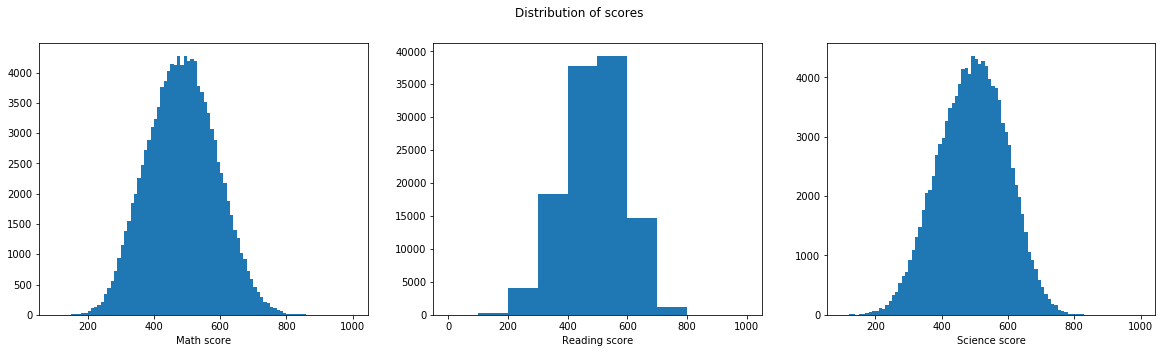

In [201]:
bin1 = np.arange(100, 1000+10, 10)
bin2 = np.arange(0, 1000+100, 100)
bin3 = np.arange(100, 1000+10, 10)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(df_main.PV1MATH, bins=bin1)
plt.xlabel('Math score')
plt.subplot(1,3,2)
plt.hist(df_main.PV1READ, bins=bin2)
plt.xlabel('Reading score')
plt.subplot(1,3,3)
plt.hist(df_main.PV1SCIE, bins=bin3)
plt.xlabel('Science score')
plt.suptitle('Distribution of scores');

The first and third bin sizes seem to be too small while the second bin size seem to be too large.

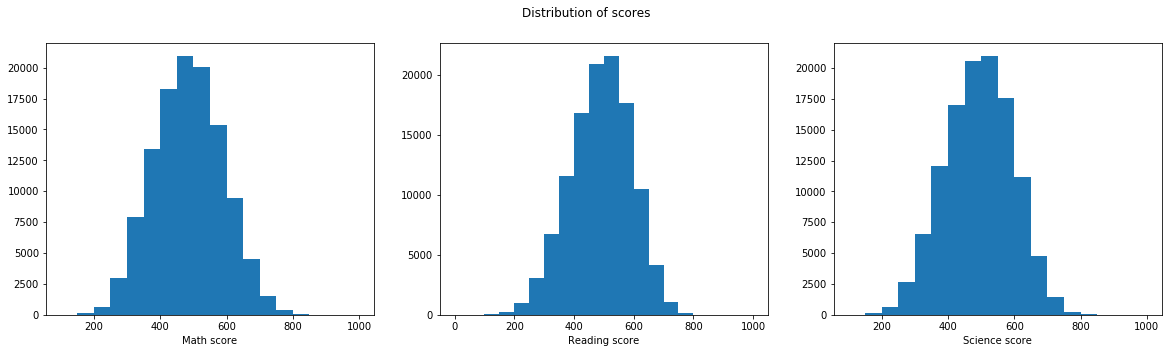

In [202]:
bin1 = np.arange(100, 1000+50, 50)
bin2 = np.arange(0, 1000+50, 50)
bin3 = np.arange(100, 1000+50, 50)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(df_main.PV1MATH, bins=bin1)
plt.xlabel('Math score')
plt.subplot(1,3,2)
plt.hist(df_main.PV1READ, bins=bin2)
plt.xlabel('Reading score')
plt.subplot(1,3,3)
plt.hist(df_main.PV1SCIE, bins=bin3)
plt.xlabel('Science score')
plt.suptitle('Distribution of scores');

Now they look much better. The scores all seem pretty normally distributed. Most scores are in the middle while very low scores and very high scores are extremely rare. Since the patterns are rather similar, we can combine all three and create one average score variable.

In [203]:
df_main['avg_score'] = (df_main.PV1MATH + df_main.PV1READ + df_main.PV1SCIE)/3

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [204]:
df_main.sample(10)

,CNT,PV1MATH,PV1READ,PV1SCIE,GENDER,MMINS,LMINS,SMINS,OUTHOURS,WEALTH,HISEI,avg_score
90230,Italy,512.6266,454.9252,550.8579,Male,200.0,200.0,400.0,4.0,0.59,43.51,506.136567
18211,Brazil,120.1979,247.9876,235.5837,Female,NaN,NaN,NaN,NaN,-1.93,NaN,201.256400
17234,Brazil,468.3829,479.5449,430.4737,Male,525.0,450.0,600.0,5.0,-0.58,73.91,459.467167
85792,Italy,551.9629,617.2623,654.4573,Female,NaN,NaN,NaN,6.0,-0.19,50.37,607.894167
61860,United Kingdom,512.7045,543.4709,539.6680,Female,NaN,NaN,NaN,NaN,-0.30,70.34,531.947800
15059,Brazil,337.9109,274.0409,356.9004,Female,180.0,180.0,135.0,5.0,-5.08,16.50,322.950733
45661,Germany,624.8715,594.9448,562.7005,Male,NaN,NaN,NaN,NaN,-0.60,59.89,594.172267
5817,Brazil,372.1841,315.1462,374.6177,Male,30.0,30.0,100.0,4.0,-2.48,32.20,353.982667
34154,Canada,342.1172,358.3172,344.4983,Female,NaN,NaN,NaN,12.0,-0.84,71.39,348.310900
89079,Italy,504.4477,561.6606,511.7866,Female,NaN,NaN,NaN,NaN,-0.42,29.80,525.964967


Next we look at the two variables that represent the family socio-economic status and wealth.

In [205]:
df_main.loc[:, ['WEALTH', 'HISEI']].describe()

,WEALTH,HISEI
count,113866.000000,109038.000000
mean,-0.081105,49.855282
std,1.060502,21.429525
min,-5.480000,11.010000
25%,-0.730000,29.730000
50%,-0.110000,50.730000
75%,0.570000,70.340000
max,3.030000,88.960000


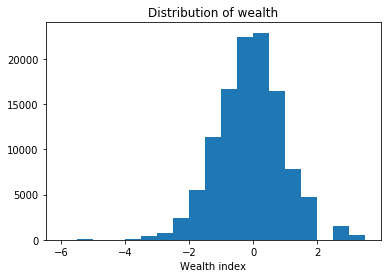

In [206]:
bin_wealth = np.arange(-6, 3.5+0.5, 0.5)
plt.hist(df_main.WEALTH.dropna(), bins=bin_wealth)
plt.title('Distribution of wealth')
plt.xlabel('Wealth index');

Since the histogram doesn't handle nan values well, the nans are dropped in this distribution. Overall wealth is distributed rather normally, except there is a dip at both ends. Generally it is centered around 0, a bit skewed to the left.

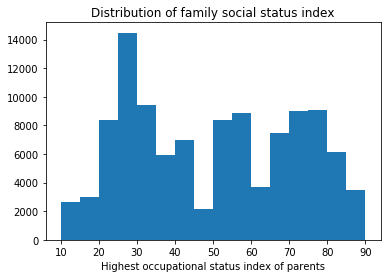

In [207]:
bin_hisei = np.arange(10, 90+5, 5)
plt.hist(df_main.HISEI.dropna(), bins=bin_hisei)
plt.title('Distribution of family social status index')
plt.xlabel('Highest occupational status index of parents');

In general, very low and very high status index are fewer than the ones in the middle. However, in this chart we see three spikes, first one around 25, second around 55 and the third around 75. It is not normally distributed like the wealth distribution. 

Now we look at the study times of students. Since the 'OUTHOURS' is in hours and the rest are in minutes, we need to make the unit consistant. 

In [208]:
# change all units to hours per week
df_main['MHRS'] = df_main.MMINS / 60
df_main['LHRS'] = df_main.LMINS / 60
df_main['SHRS'] = df_main.SMINS / 60

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [209]:
df_main.sample(5)

,CNT,PV1MATH,PV1READ,PV1SCIE,GENDER,MMINS,LMINS,SMINS,OUTHOURS,WEALTH,HISEI,avg_score,MHRS,LHRS,SHRS
81129,Italy,707.9062,635.6109,661.2645,Female,NaN,NaN,NaN,NaN,-0.65,31.08,668.260533,NaN,NaN,NaN
106119,Russian Federation,377.1693,399.2702,443.3420,Male,225.0,90.0,360.0,1.0,-1.19,29.47,406.593833,3.750000,1.500000,6.000000
2082,Brazil,417.2067,491.9996,450.7087,Female,80.0,80.0,40.0,6.0,-2.19,NaN,453.305000,1.333333,1.333333,0.666667
36285,Canada,547.9124,514.6701,561.9545,Male,NaN,NaN,NaN,NaN,0.15,70.57,541.512333,NaN,NaN,NaN
94057,Italy,387.9966,419.0025,409.1197,Female,220.0,330.0,110.0,4.0,-0.42,22.57,405.372933,3.666667,5.500000,1.833333


In [210]:
df_main.drop(['MMINS', 'LMINS', 'SMINS'], axis=1, inplace=True)

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [211]:
df_main.loc[:, ['MHRS', 'LHRS', 'SHRS', 'OUTHOURS']].describe()

,MHRS,LHRS,SHRS,OUTHOURS
count,68409.000000,67997.000000,66903.000000,73943.000000
mean,4.032664,4.091633,3.549248,11.020151
std,1.613739,1.718088,2.173239,10.672742
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,4.000000
50%,4.000000,4.000000,3.000000,8.000000
75%,5.000000,5.000000,5.000000,15.000000
max,27.000000,34.416667,30.000000,180.000000


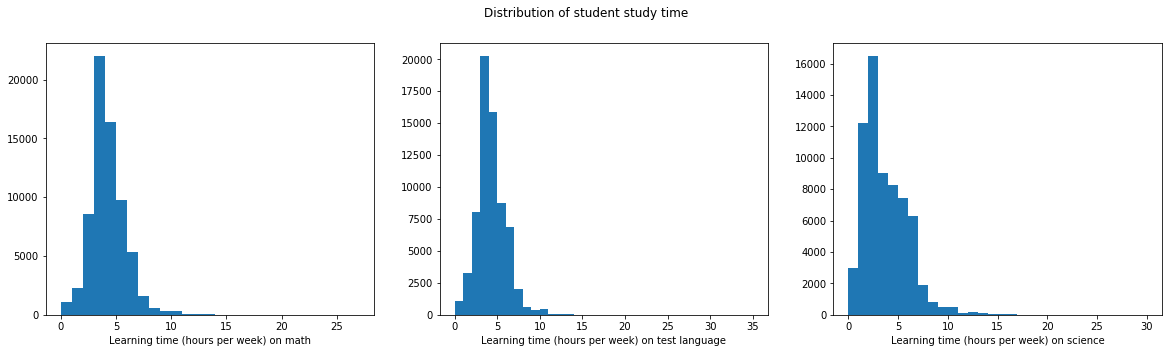

In [212]:
bin1 = np.arange(0, 27+1, 1)
bin2 = np.arange(0, 35+1, 1)
bin3 = np.arange(0, 30+1, 1)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(df_main.MHRS.dropna(), bins=bin1)
plt.xlabel('Learning time (hours per week) on math')
plt.subplot(1,3,2)
plt.hist(df_main.LHRS.dropna(), bins=bin2)
plt.xlabel('Learning time (hours per week) on test language')
plt.subplot(1,3,3)
plt.hist(df_main.SHRS.dropna(), bins=bin3)
plt.xlabel('Learning time (hours per week) on science')
plt.suptitle('Distribution of student study time');

It seems that they are all skewed to the right, some outliers might be at the right end. Let's zoom in to the main part.

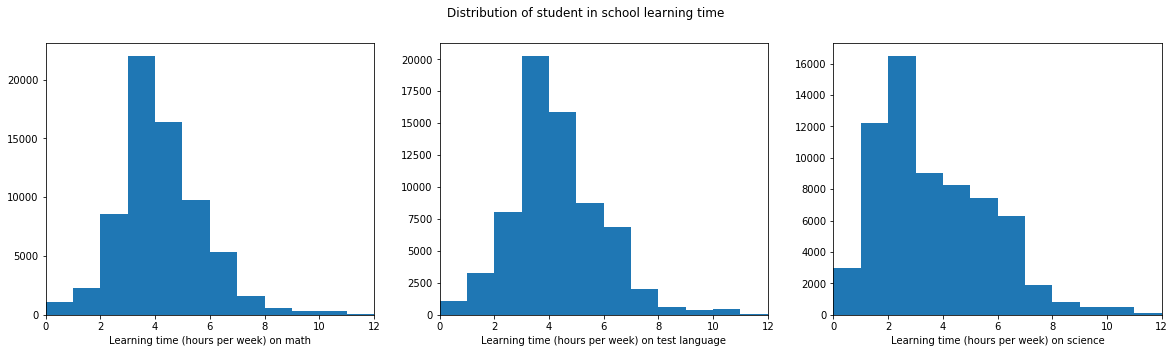

In [262]:
bin1 = np.arange(0, 27+1, 1)
bin2 = np.arange(0, 35+1, 1)
bin3 = np.arange(0, 30+1, 1)
plt.figure(figsize=(20,5))
ax1 = plt.subplot(1,3,1)
plt.hist(df_main.MHRS.dropna(), bins=bin1)
ax1.set_xlim(0, 12)
plt.xlabel('Learning time (hours per week) on math')
ax2 = plt.subplot(1,3,2)
plt.hist(df_main.LHRS.dropna(), bins=bin2)
ax2.set_xlim(0, 12)
plt.xlabel('Learning time (hours per week) on test language')
ax3 = plt.subplot(1,3,3)
plt.hist(df_main.SHRS.dropna(), bins=bin3)
plt.xlabel('Learning time (hours per week) on science')
plt.suptitle('Distribution of student in school learning time')
ax3.set_xlim(0, 12);

On math and test language, the learning time is centered around 4 hours, while on science, it is a bit less. Since the overall time is quite similar, we calculate their average value and set as a new variable. 

In [223]:
df_main['SchoolHRS'] = (df_main.MHRS + df_main.LHRS + df_main.SHRS) / 3

/Users/lirongzhang/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


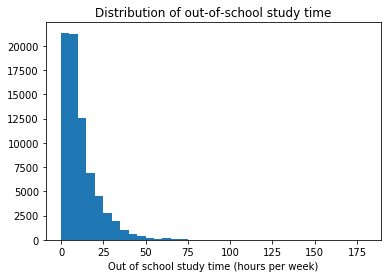

In [224]:
bin = np.arange(0, 180+5, 5)
plt.hist(df_main.OUTHOURS.dropna(), bins=bin)
plt.xlabel('Out of school study time (hours per week)')
plt.title('Distribution of out-of-school study time');

While most have a very little out-of-school study time, some very few students have extremely long out-of-school study hours. It is very skewed to the right, most seem to have a out-of-school study time of around 4-5 hours.

Next we explore the two catogorical variables: country and gender.

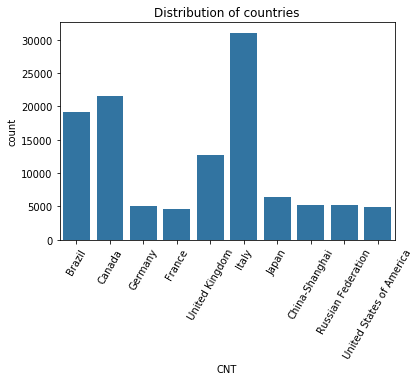

In [226]:
base_color = sb.color_palette()[0]
sb.countplot(df_main.CNT, color=base_color)
plt.xticks(rotation=60)
plt.title('Distribution of countries');

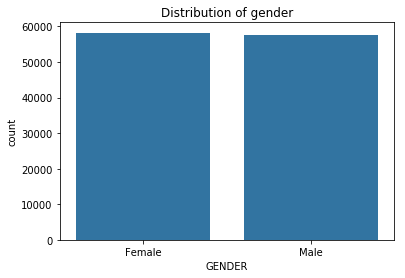

In [227]:
base_color = sb.color_palette()[0]
sb.countplot(df_main.GENDER, color=base_color)
plt.title('Distribution of gender');

Country distribution is not very uniform, many students attended the survey from Italy, Canada and Brazil, while not so many from China, Russia and the US. The gender distribution is quite uniform. 

### Discussion

All three scores are normally distributed. No unusual points observed and no need for transformation.


The study time in school and out of school vary a lot, a little number of students have very long study hours in school and out of school making the distribution skewed to the right. We had to set the xlim parameter to zoom to see the majority of the data. In order be consistant and make variables comparable, in school learning time minutes per week are transformed to hours per week unit. 

## Bivariate Exploration

First we look at the correlation of all pairwise relationships.

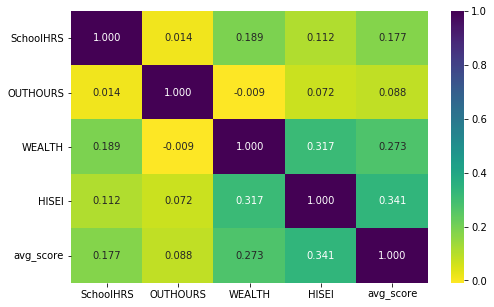

In [228]:
numeric_vars = ['SchoolHRS', 'OUTHOURS', 'WEALTH', 'HISEI', 'avg_score']
categoric_vars = ['CNT', 'GENDER']
plt.figure(figsize=(8, 5))
sb.heatmap(data=df_main[numeric_vars].corr(), annot=True, fmt = '.3f', cmap = 'viridis_r');

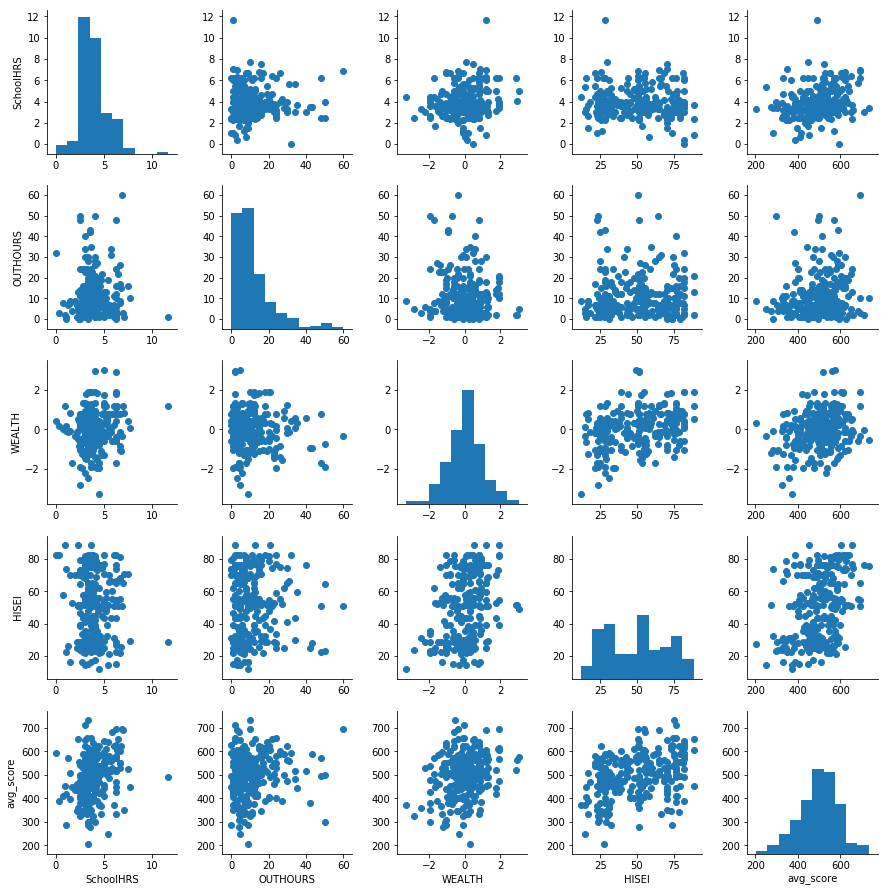

In [229]:
df_samp = df_main.sample(500)
g = sb.PairGrid(data=df_samp.dropna(), vars=numeric_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

The correlation between out-of-school study hours and scores are pretty low. Family wealth seems to have a higher correlation with the average score compared with school learning hours. Surprisingly, the occupation status of parents has the highest correlation coefficient among all numeric variables.

Now on to the categorical variables.

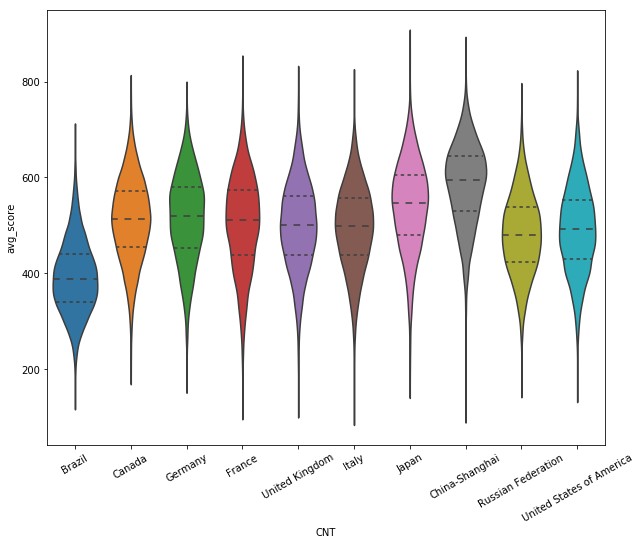

In [230]:
plt.figure(figsize=(10, 8))
sb.violinplot(data=df_main, x='CNT', y='avg_score', inner = 'quartile')
plt.xticks(rotation=30);

We can see that most countries perform similarly, except China scores rather higher on average, and Brazil much lower on average. However, interestingly, China has a very long tail, which shows a large disparity between students in China.

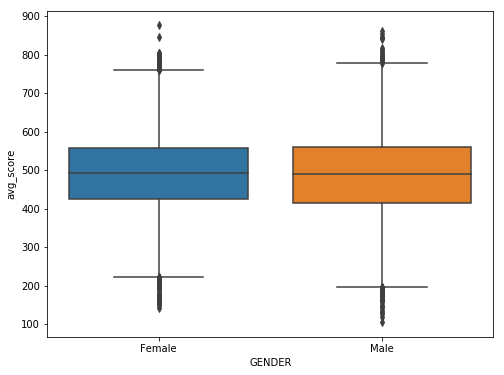

In [231]:
plt.figure(figsize=(8, 6))
sb.boxplot(data=df_main, x='GENDER', y='avg_score');

Gender doesn't seem to make any big difference to the average scores. On average, they perform similarly, except males can have a lower lowest scores while female can have a higher highest scores, but those are very rare.

### Discussion

It turns out that the average scores seem to be most strongly correlated with the parents occupation status and then family wealth. The study hours be it at school or out of school have a rather weak correlation. As parents occupation status and family wealth increase, scores tend to increase as well. 


Family wealth and parents occupation status also has a strong correlation, which makes sense. Interestingly, family wealth and school learning time also seem to have a positive correlation.

## Multivariate Exploration

In this part, we want to explore if our previous conclusions are still valid across different countries and genders. 

First we check if China and Japan score better is due to students' long study hours. Could country actually play a big role in the scores?

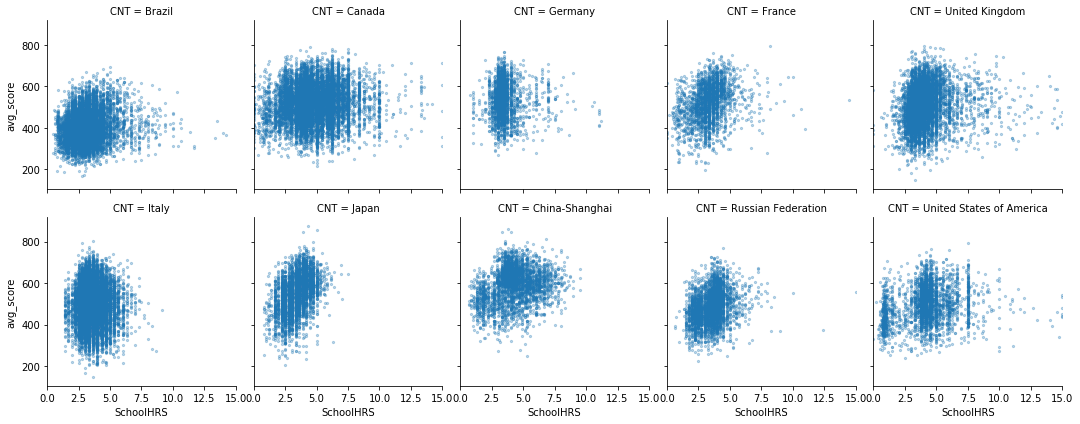

In [185]:
g = sb.FacetGrid(data=df_main, col='CNT', col_wrap=5)
g.map(plt.scatter, 'SchoolHRS', 'avg_score', alpha=0.3, s=5)
g.set(xlim=(0, 15));

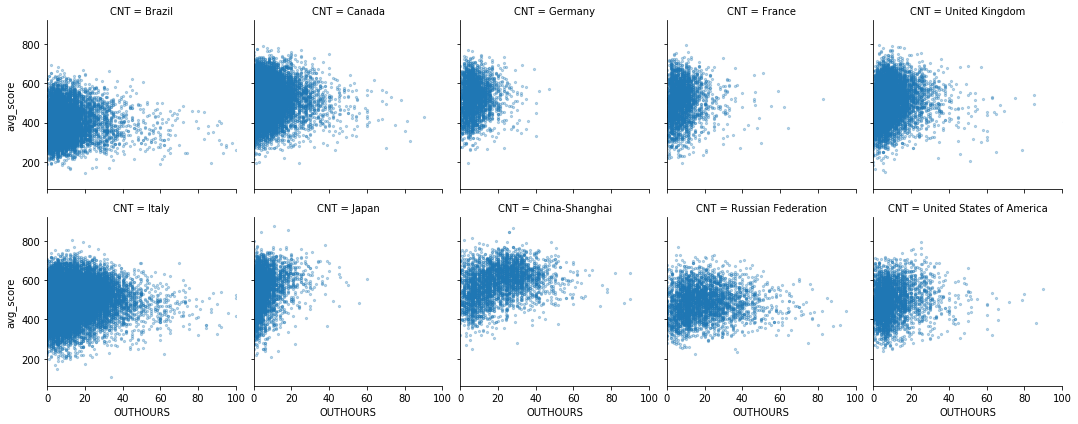

In [241]:
g = sb.FacetGrid(data=df_main, col='CNT', col_wrap=5)
g.map(plt.scatter, 'OUTHOURS', 'avg_score', alpha=0.3, s=5)
g.set(xlim=(0, 100));

The study hours in school and out of school for Chinese and Japanese students don't stand out among others. Comparatively, China seem to have longer study hours out of school, but Russia and Italy also seem pretty long. Surpringly, Japan actually has rather short study hours even though they perform also pretty well. But it could also be that there are not as many participants from China and Japan, that's why we don't see a huge difference.

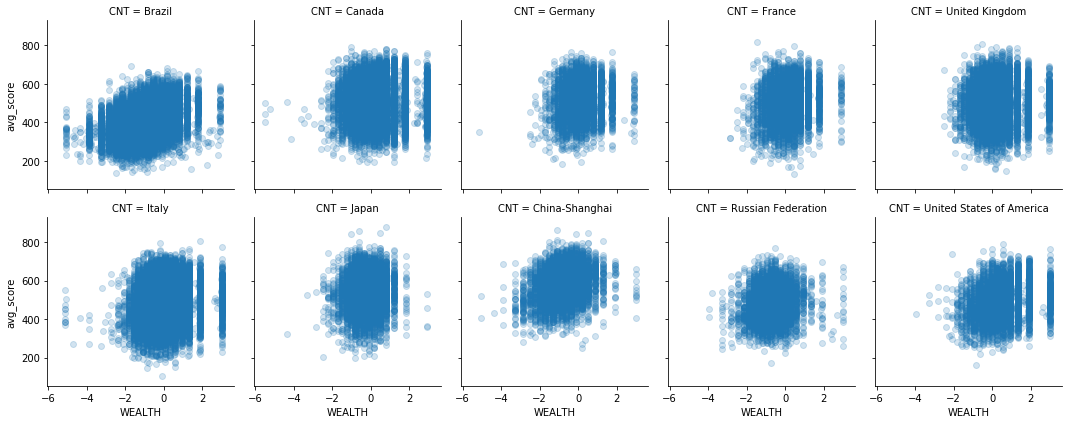

In [246]:
g = sb.FacetGrid(data=df_main, col='CNT', col_wrap=5)
g.map(plt.scatter, 'WEALTH', 'avg_score', alpha=0.2);

For China, US, and Brazil, there seems to some positive correlation between wealth and average scores. It makes perfect sense, since these are the countries that have very large economic inequality, poorer kids are probably less accessible to learning resources.

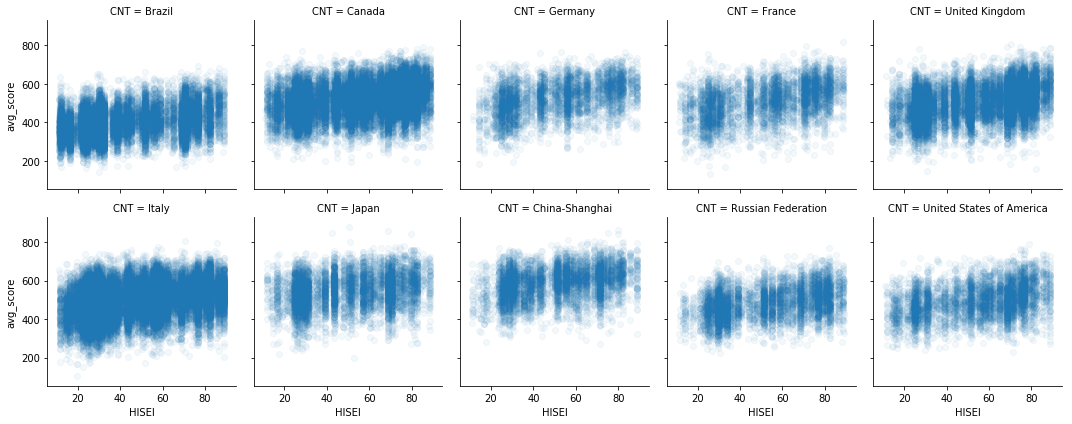

In [245]:
g = sb.FacetGrid(data=df_main, col='CNT', col_wrap=5)
g.map(plt.scatter, 'HISEI', 'avg_score', alpha=0.05);

There isn't any country that stands out when it comes to parent occupation status and scores. The overall correlation is positive.

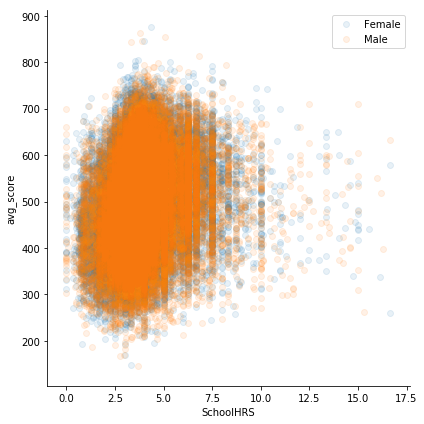

In [253]:
g = sb.FacetGrid(data=df_main, hue='GENDER', size=6)
g.map(plt.scatter, 'SchoolHRS', 'avg_score', alpha=0.1)
plt.legend();

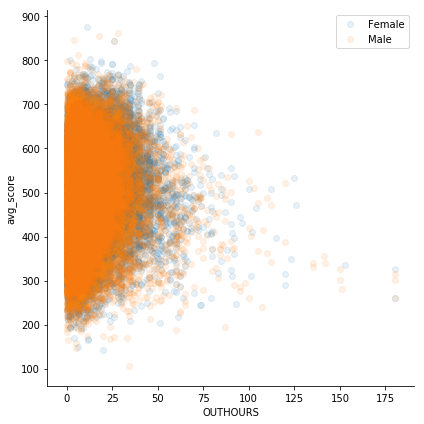

In [260]:
g = sb.FacetGrid(data=df_main, hue='GENDER', size=6)
g.map(plt.scatter, 'OUTHOURS', 'avg_score', alpha=0.1)
plt.legend();

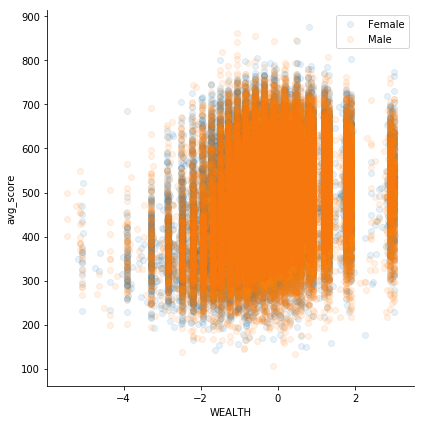

In [252]:
g = sb.FacetGrid(data=df_main, hue='GENDER', size=6)
g.map(plt.scatter, 'WEALTH', 'avg_score', alpha=0.1)
plt.legend();

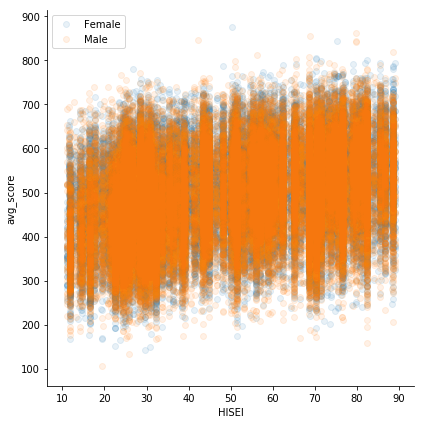

In [251]:
g = sb.FacetGrid(data=df_main, hue='GENDER', size=6)
g.map(plt.scatter, 'HISEI', 'avg_score', alpha=0.1)
plt.legend();

There is not much difference between genders on how school study hours, wealth, and parents status affect scores.

### Discussion

In countries where economic inequality is common, like China, US, and Brazil, wealth seems to play a role in average scores. The wealthier the family, the higher the scores. But in other countries, this phenomenon doesn't exist.  


Surprisingly, study hours are not a key factor in determining the average scores. Even in some countries where study hours are shorter, the scores are higher, and the opposite scenario also happens.